In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import tanh
from IPython.display import clear_output
from sklearn import preprocessing
from sklearn.utils import shuffle

data = pd.read_csv('../../cup_dataset/ML-CUP20-TR.csv',sep=',',index_col=0)
data = data.to_numpy()
tx = data[:,:-2]
ty = data[:,-2:]
tx.shape, ty.shape

((1523, 10), (1523, 2))

In [4]:
import sys
sys.path.append("../../")
from MLP import *
from utils import proximal_bundle_method

In [ ]:
errors_m = []
iterations_m = []
times_m = []

errors_b = []
iterations_b = []
times_b = []

for _ in range(10):
  n = MLP(  Nh=[10], Nu=10, Ny=2, f='tanh', f_out='ide', w_scale=2, w_range=.7)
  init_w = np.copy(n.w)
  # train the net with momentum training
  g_m,e_m,t_m,ep_m = n.momentum_train(tx, ty,alpha=1e-02,beta=0.5,epsilon=1e-12,tresh=.01,max_epochs=2000)
  errors_m.append(e_m[-1])
  iterations_m.append(ep_m)
  times_m.append(t_m[-1])

  n.w = init_w

  # train the network with bundle method
  g_b, e_b, t_b,ep_b = proximal_bundle_method(n, tx, ty, mu=10, reg_param=1e-12,epsilon=1e-02,max_epochs=200)
  errors_b.append(e_b[-1])
  iterations_b.append(ep_b)
  times_b.append(t_b[-1])

optimal
0.009890700816890434
0.009890700816890434


In [ ]:
print(errors_m )
print(iterations_m )
print(times_m)

print(errors_b) 
print(iterations_b) 
print(times_b) 

print(' MOMENTUM ')
best_m = min(errors_m)
print('best',best_m)
print('mean',np.mean(errors_m))
print('median',np.median(errors_m))
print('variance',np.var(errors_m))

print()
print(' BUNDLE ')
best_b = min(errors_b)
print('best',best_b)
print('mean',np.mean(errors_b))
print('median',np.median(errors_b))
print('variance',np.var(errors_b))

print()
best = min([best_m,best_b])
print(best)

[9.896095069660802, 10.292412859243216, 11.156000884891796, 9.554035104885031, 11.65753611691054, 9.557234562179504, 10.058089180814966, 10.15931614304806, 9.738042867016983, 9.77643133580715]
[217, 218, 261, 186, 221, 227, 198, 278, 260, 253]
[48.31267589299932, 47.98831508999865, 58.67110402800063, 42.28189942600147, 52.17983576500046, 52.569831618000535, 45.73540941199826, 67.62476631100071, 59.494054789000074, 56.916999929002486]
[10.795962270388195, 10.566406871949077, 11.1563131954772, 10.402724035150342, 9.664270170200611, 10.285956174436555, 9.391671413035278, 11.508237206993046, 9.353328912275039, 9.596937663395789]
[201, 188, 194, 201, 174, 201, 201, 201, 161, 152]
[131.79448015799971, 121.46345690599992, 126.52266488099849, 135.47360662699975, 112.27426924300016, 137.75318415899892, 136.22408870799882, 131.07458172299812, 96.18750199200076, 90.99938840300092]
 MOMENTUM 
best 9.554035104885031
mean 10.184519412445805
median 9.977092125237885
variance 0.43818777979360257

 BUN

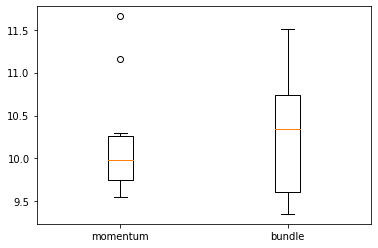

In [ ]:
_ = plt.boxplot((errors_m,errors_b), labels=['momentum','bundle'])

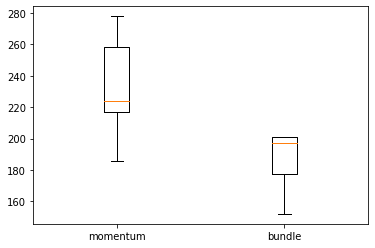

In [ ]:
_ = plt.boxplot((iterations_m,iterations_b), labels=['momentum','bundle'])

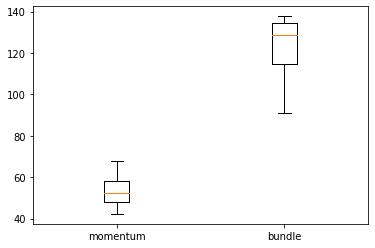

In [ ]:
_ = plt.boxplot((times_m,times_b), labels=['momentum','bundle'])

In [36]:
b = 9.353328912275039

n = MLP(  Nh=[10], Nu=10, Ny=2, f='tanh', f_out='ide', w_scale=2, w_range=.7)

# now i train my net. In this case i use classical momentum with no regularization. after training i plot some convergence-curves 
# using data i collected during training

init_w = np.copy(n.w)

# train the net with momentum training
g_m,e_m,t_m,ep_m = n.momentum_train(tx, ty,alpha=1e-02,beta=0.6,epsilon=1e-12,tresh=.01,max_epochs=3000)

n.w = init_w

# train the network with bundle method
from utils import proximal_bundle_method
g_b, e_b, t_b,ep_b = proximal_bundle_method(n, tx, ty, mu=10, reg_param=1e-12,epsilon=1e-02,max_epochs=200)

print( e_b[-1], e_m[-1], b )

optimal
0.03452433449613381
9.654410487163632 9.949975599557229 9.353328912275039


In [37]:
b = min( ( e_b[-1], e_m[-1], b ) )
def correct(es,b):
  for i in range(len(es)):
    es[i] = abs(es[i] - b )/b

correct(e_m, b)
correct(e_b, b)
print(e_b)
print(e_m)

[187.15545093077515, 134.8799126237441, 72.833117347865, 9.44830883911898, 9.44830883911898, 9.44830883911898, 6.6485702245345, 2.9122086894682053, 2.04299417944472, 1.38998253605787, 1.0736739802681514, 1.0736739802681514, 0.805215309148626, 0.7218912184662176, 0.6296014874056275, 0.5653637279328873, 0.5653637279328873, 0.5653637279328873, 0.5653637279328873, 0.42152341069177596, 0.42152341069177596, 0.42152341069177596, 0.42152341069177596, 0.3928649789435573, 0.3798680704691852, 0.34609430368295613, 0.34609430368295613, 0.3100269885434775, 0.3100269885434775, 0.3100269885434775, 0.3034303826943307, 0.2589476018763674, 0.2589476018763674, 0.25109091260423727, 0.2449766440951347, 0.23362954282736298, 0.23362954282736298, 0.20498757301746026, 0.20498757301746026, 0.20498757301746026, 0.168014072604239, 0.168014072604239, 0.168014072604239, 0.16081132484002456, 0.16081132484002456, 0.141630233548325, 0.141630233548325, 0.13831207361034092, 0.12304109269239927, 0.12304109269239927, 0.123

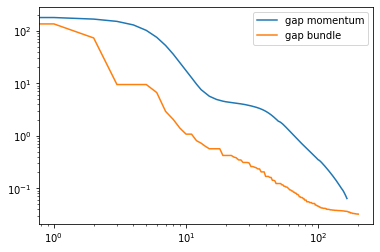

In [38]:
# plot the results with iterations
plt.plot( e_m,label='gap momentum')
plt.plot( e_b,label='gap bundle')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.savefig("cup_iter")

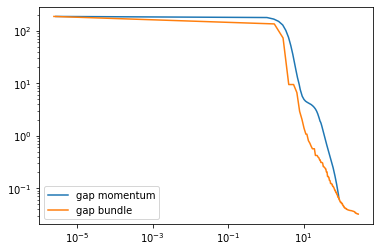

In [39]:
# plot the results with time
plt.plot(t_m, e_m,label='gap momentum')
plt.plot(t_b, e_b,label='gap bundle')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.savefig("cup_time")